In [19]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'tensorflow'

In [7]:
data = pd.read_excel('/Users/kamyasarda/Downloads/Date_Fruit_Datasets.xlsx')
data.head(5)

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


In [8]:
data.shape

(898, 35)

In [9]:
x = data.drop('Class', axis=1) # features
y = data['Class'] # class

In [10]:
print('Samples present in each class')
y.value_counts()

Samples present in each class


Class
DOKOL     204
SAFAVI    199
ROTANA    166
DEGLET     98
SOGAY      94
IRAQI      72
BERHI      65
Name: count, dtype: int64

In [18]:

#define name to_categorical function
from tensorflow.keras.utils import to_categorical
class_labels = {
    'DOKOL': 0,     
    'SAFAVI': 1,   
    'ROTANA': 2,   
    'DEGLET': 3,     
    'SOGAY': 4,     
    'IRAQI': 5,      
    'BERHI': 6  
}

y_transformed = to_categorical(y.map(class_labels).values, num_classes=len(class_labels))
y_transformed[:5]

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
x_transformed = StandardScaler().fit_transform(x)
x_transformed[:5]

array([[ 1.15563972,  0.78394219,  0.60450726,  1.3116427 , -1.12956824,
         1.0757039 ,  0.70862801,  1.10875224,  0.87187257, -0.04679741,
         1.12543323,  1.09122794, -0.06986663, -0.6884426 ,  1.16993442,
         0.24046724,  0.53819492,  0.43558116, -0.02394082, -0.40172428,
        -0.60717863,  0.81076886, -0.69515689, -0.55381039,  0.55548747,
        -0.34968313, -0.57528126,  0.21856505, -1.34281073, -1.26726851,
        -0.82272771,  0.53834033,  0.43559289, -0.02390791],
       [ 0.37169955,  0.06706714, -0.18747301,  0.8697892 , -1.89977082,
         0.43143676,  0.85741044,  0.32337263,  0.80485249, -0.05137327,
         1.68899762,  1.59814193, -0.06497537,  0.01301896,  1.76508448,
         0.51903591, -0.00336621,  0.28410468, -0.02469953, -0.28267776,
        -0.52905251,  0.40278056, -0.34162048, -0.41303366,  0.2574945 ,
        -0.56215422, -0.66140671, -0.29800906, -0.11703018, -0.49322492,
        -0.25342172, -0.00354973,  0.28411298, -0.02469438],
  

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_transformed, y_transformed, test_size=0.2, random_state=42, stratify=y_transformed)

In [ ]:
split = np.sum(y_train, axis=0, dtype='uint8')
print('train dataset')
for i in range(7): print('class', i, ":", split[i])

print()
    
split = np.sum(y_test, axis=0, dtype='uint8')
print('test dataset')
for i in range(7): print('class', i, ":", split[i])

train dataset
class 0 : 163
class 1 : 159
class 2 : 133
class 3 : 78
class 4 : 75
class 5 : 58
class 6 : 52

test dataset
class 0 : 41
class 1 : 40
class 2 : 33
class 3 : 20
class 4 : 19
class 5 : 14
class 6 : 13


In [ ]:
model = Sequential()

model.add(layers.Dense(512, 'relu', input_shape=(34,)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(256, 'relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(128, 'relu'))
model.add(layers.Dense(7,'softmax'))

model.compile('Adam','categorical_crossentropy', ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               17920     
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 903       
Total params: 183,047
Trainable params: 183,047
Non-trainable params: 0
__________________________________________________

2022-05-26 17:13:47.933844: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [ ]:
history = model.fit(x_train, y_train, epochs=25, validation_data=(x_test, y_test), callbacks=[EarlyStopping(patience=5, restore_best_weights=True)])

2022-05-26 17:13:48.146498: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/25
23/23 [==============================] - 1s 17ms/step - loss: 0.9288 - accuracy: 0.6769 - val_loss: 0.4070 - val_accuracy: 0.8222
Epoch 2/25
23/23 [==============================] - 0s 7ms/step - loss: 0.4192 - accuracy: 0.8287 - val_loss: 0.2950 - val_accuracy: 0.8889
Epoch 3/25
23/23 [==============================] - 0s 7ms/step - loss: 0.3190 - accuracy: 0.8760 - val_loss: 0.2794 - val_accuracy: 0.8833
Epoch 4/25
23/23 [==============================] - 0s 6ms/step - loss: 0.3063 - accuracy: 0.8900 - val_loss: 0.2529 - val_accuracy: 0.9167
Epoch 5/25
23/23 [==============================] - 0s 6ms/step - loss: 0.2354 - accuracy: 0.9178 - val_loss: 0.2352 - val_accuracy: 0.9222
Epoch 6/25
23/23 [==============================] - 0s 14ms/step - loss: 0.2206 - accuracy: 0.9095 - val_loss: 0.2370 - val_accuracy: 0.9056
Epoch 7/25
23/23 [==============================] - 0s 13ms/step - loss: 0.2494 - accuracy: 0.9109 - val_loss: 0.2382 - val_accuracy: 0.9167
Epoch 8/25
23/23 

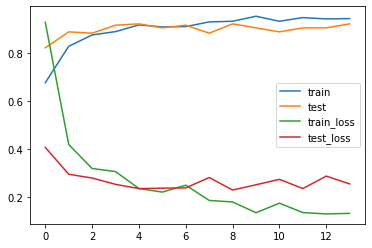

In [ ]:
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.plot(history.history['loss'], label='train_loss')
pyplot.plot(history.history['val_loss'], label='test_loss')
pyplot.legend()
pyplot.show()

In [ ]:
loss, acc = model.evaluate(x_test, y_test)

print('Testing metrics')
print('accuracy:', round(acc*100,3))
print('loss:', round(loss,3))

6/6 [==============================] - 0s 3ms/step - loss: 0.2292 - accuracy: 0.9222
Testing metrics
accuracy: 92.222
loss: 0.229
